In [44]:
import numpy as np
import os #pic.address
from PIL import Image

In [45]:
train_data ='drive/MyDrive/BTVNpic/hinhsosanh/Train'
test_data='drive/MyDrive/BTVNpic/hinhsosanh/Test'
validation_data='drive/MyDrive/BTVNpic/hinhsosanh/Validation'

In [46]:
listdata_train=[]
listdata_test=[]
listdata_validation=[]
dict={'tai':[1],'hoa':[0]}

In [47]:
def Getdata(dirdata,lstdata):
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [48]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [49]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(70, 1)

In [50]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])
x_test.shape

(14, 150, 150, 3)

In [51]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(12, 150, 150, 3)

In [52]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [53]:
yname=y_train.flatten()

In [54]:
class_names=['hoa','tai']
x_pre=x_test
y_pre=y_test
y_pre

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]])

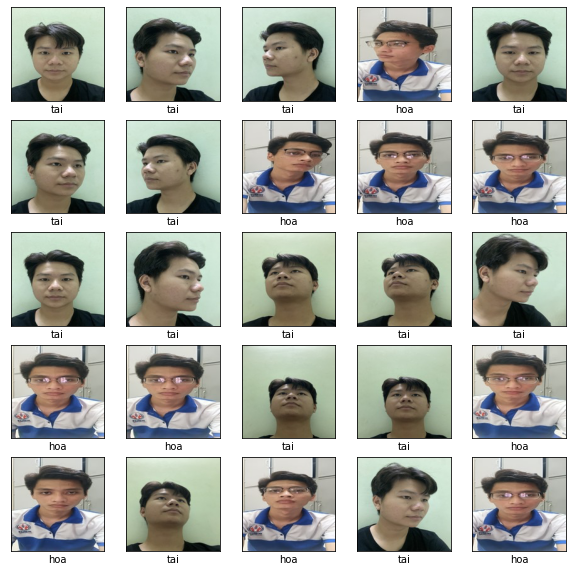

In [55]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [56]:
from keras.utils import np_utils
x_train=x_train.reshape(70,67500)
x_test=x_test.reshape(14,67500)
x_validation=x_validation.reshape(12,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,2)
y_test= np_utils.to_categorical(y_test,2)
y_validation= np_utils.to_categorical(y_validation,2)

In [57]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(67500,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               34560512  
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 35,086,850
Trainable params: 35,086,850
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [63]:
history=model.fit(x_train,y_train,batch_size=90,epochs=200,verbose=1)


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.6828 - accuracy: 0.6000
Epoch 2/200
1/1 [==============================] - 0s 477ms/step - loss: 16.6502 - accuracy: 0.6857
Epoch 3/200
1/1 [==============================] - 0s 477ms/step - loss: 1310.0758 - accuracy: 0.4286
Epoch 4/200
1/1 [==============================] - 0s 462ms/step - loss: 75.2338 - accuracy: 0.4286
Epoch 5/200
1/1 [==============================] - 0s 469ms/step - loss: 141.1360 - accuracy: 0.5714
Epoch 6/200
1/1 [==============================] - 0s 484ms/step - loss: 35.0464 - accuracy: 0.4286
Epoch 7/200
1/1 [==============================] - 0s 496ms/step - loss: 88.3543 - accuracy: 0.5714
Epoch 8/200
1/1 [==============================] - 0s 490ms/step - loss: 4.1428 - accuracy: 0.6000
Epoch 9/200
1/1 [==============================] - 0s 470ms/step - loss: 21.1096 - accuracy: 0.5714
Epoch 10/200
1/1 [==============================] - 0s 491ms/step - loss: 19.8508 - accuracy: 0.4286
E

In [64]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.007271133363246918
Test accuary 1.0


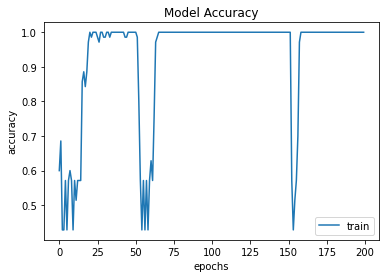

In [65]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

In [66]:
no_yes=['No','Yes']

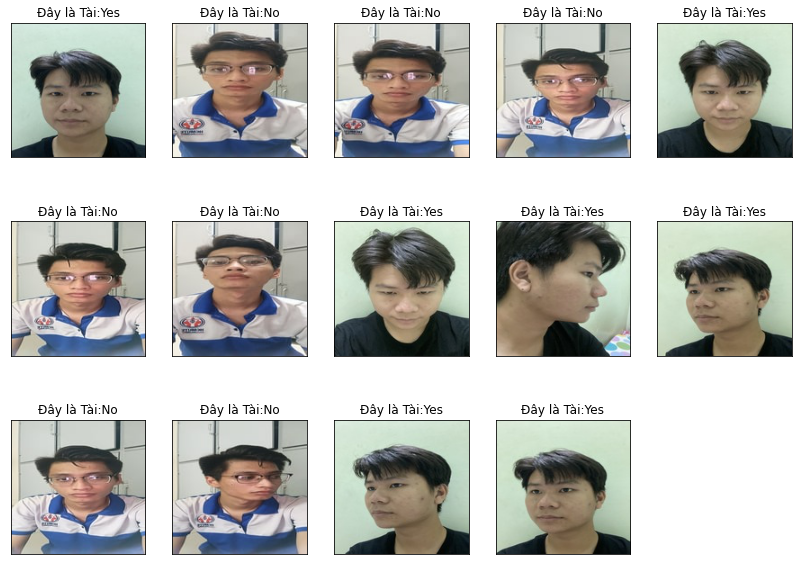

In [71]:
plt.figure(figsize=(14, 14))
for i in range(14):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Đây là Tài:" + str(no_yes[np.argmax(model.predict(x_pre[i].reshape((-1,67500))))]))
plt.show()